<a href="https://colab.research.google.com/github/adeshsingh5505/BoilerEfficiency/blob/main/boilerxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pandas numpy scikit-learn tensorflow joblib


In [ ]:
# ANN model in Python (Boiler Efficiency Prediction)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/data_modified19.csv')


/tmp/ipython-input-10-2746623988.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data_modified19.csv')


In [ ]:
correlation = df.corr()
print(correlation)


ValueError: could not convert string to float: 'date'

In [ ]:
plt.figure(figsize=(10, 8))  # adjust size as needed
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Parameter Correlations')
plt.show()


NameError: name 'correlation' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
strong_corr = correlation[(correlation > 0.7) | (correlation < -0.7)]
print(strong_corr)


NameError: name 'correlation' is not defined

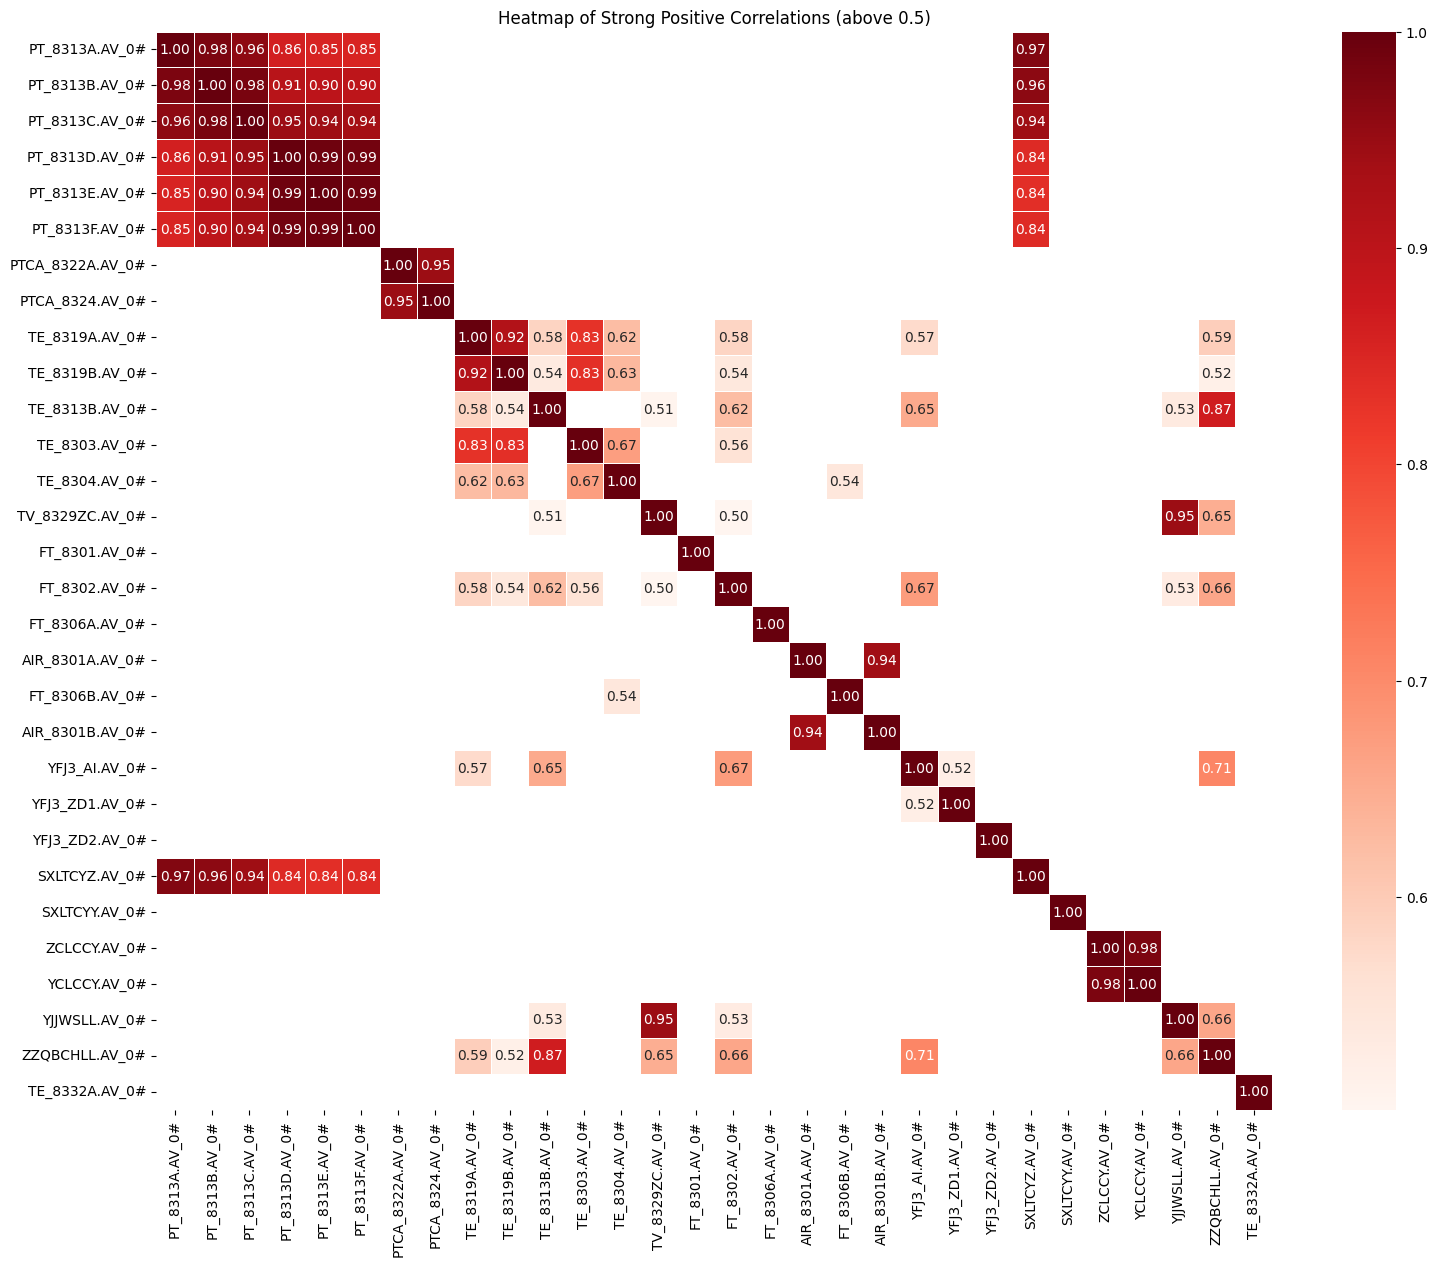

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')


numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = numeric_df.dropna()

correlation_matrix = numeric_df.corr()

# Filter out negative and weak correlations (keep only > 0.5)
filtered_corr = correlation_matrix.copy()
filtered_corr[filtered_corr <= 0.5] = None

plt.figure(figsize=(18, 14))
sns.heatmap(filtered_corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5, mask=filtered_corr.isnull())
plt.title('Heatmap of Strong Positive Correlations (above 0.5)')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/data_modified19.csv')

numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = numeric_df.dropna()


correlation_matrix = numeric_df.corr()

#  Filter: keep only correlations ≤ 0.5 (including negatives)
filtered_corr = correlation_matrix.copy()
filtered_corr[filtered_corr > 0.5] = None

plt.figure(figsize=(18, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=filtered_corr.isnull())
plt.title('Heatmap of Weak and Negative Correlations (≤ 0.5)')
plt.show()


/tmp/ipython-input-17-2972894869.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data_modified19.csv')


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1800x1400 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load data
df = pd.read_csv("/content/data_modified19.csv")

# Define target and features
target = "Boiler outlet steam temperature"
X = df.drop(columns=["date", target])  # Drop non-feature columns
y = df[target]                         # Target variable

# Fill missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define single set of hyperparameters
param_dist = {
    'max_depth': [16],
    'learning_rate': [0.05],
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform randomized search with just one iteration
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=1,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Predictions and evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test, y_pred)

# Output results
print("Best Parameters:", random_search.best_params_)
print(f"Test RMSE: {rmse:.4f}")
print("R2 Score:", r2s)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 16, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Test RMSE: 0.2993
R2 Score: 0.9957225293222001


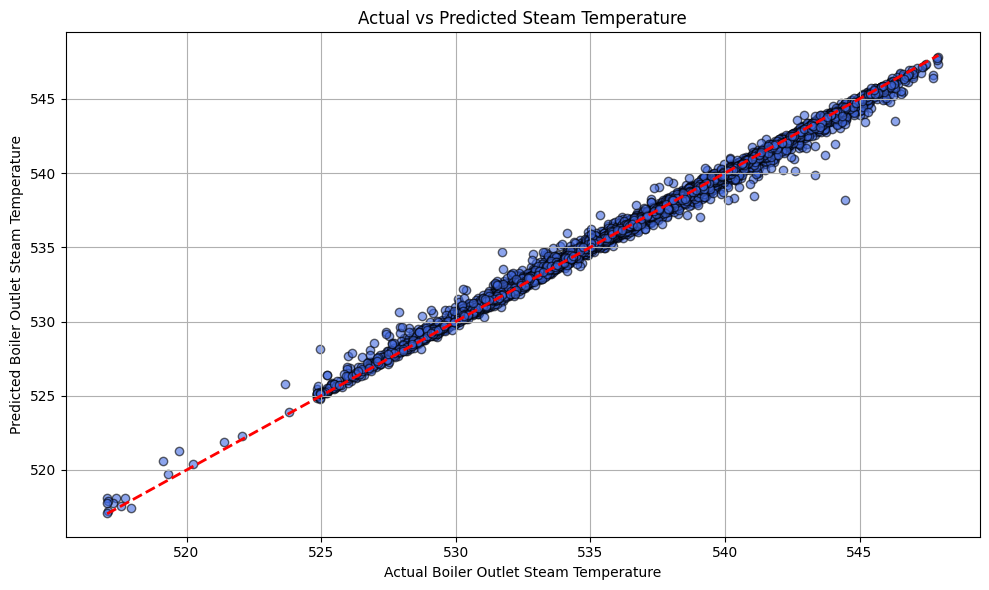

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Boiler Outlet Steam Temperature')
plt.ylabel('Predicted Boiler Outlet Steam Temperature')
plt.title('Actual vs Predicted Steam Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())


['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
